# Procurando a Ursal no Orkut

Sou uma pessoa de esquerdas, tem alguns anos. Participo do movimento cicloativista em S√£o Paulo, fiz coisas com ativismo de dados, trabalhei no Hacklab, que fez o site do Lula. Praticamente todo santo dia conversando com pessoas de esquerdas, militantes de partidos de esquerda. 

Nunca tinha ouvido falar sobre a URSAL at√© o momento maravilhoso de Cabo Daciolo no debate com o Ciro Gomes. Fiquei completamente surpreso... assim como todo mundo que eu conhecia. E descobri gente no Twitter que seguia acreditando na Ursal. Mas ningu√©m da esquerda. Todos de direita, e, para ser mais exato, da "alt-right". 

Al√©m disso, teve um magnif√≠co v√≠deo do canal Meteoro do Youtube falando sobre a origem do termo Ursal. [Uma contribui√ß√£o ir√¥nica de um texto de 2001 no site do Olavo de Carvalho](https://www.youtube.com/watch?v=c1fs6rjmaVE).

E num belo momento, lembrei que tinha crawleado todo o acervo de comunidades do Orkut[1]. E quis dar uma olhada para ver se a URSAL j√° existia desde tempos antigos. E se tinha gente de esquerda que falava sobre isso. Afinal, essa √© a coisa maravilhosa sobre a conspira√ß√£o: uma conspira√ß√£o tipo a URSAL precisaria de imenso apoio popular. E as pessoas que deveriam estar interessadas em fazer a conspira√ß√£o ocorrer **n√£o faziam ideia dela**.  

[1] Sim, eu fiz baixei todo o acervo de comunidades do orkut. Basicamente porque sou um monstro. E tamb√©m porque estava sem nada o que fazer no carnaval de 2017.


In [5]:
import pandas as pd
from dateparser import parse

%matplotlib inline

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 300)

In [6]:
topicos_ursal = pd.read_csv('topicos_ursal.csv')
comentarios_ursal = pd.read_csv('comentarios_ursal.csv')

## Vamos ver a distribui√ß√£o dos coment√°rios com o tempo. 


In [7]:
comentarios_ursal['timestamp_comentario'] = comentarios_ursal.data_comentario.apply(lambda x: parse(x))
comentarios_ursal['Ano'] = comentarios_ursal.timestamp_comentario.apply(lambda x: x.year)

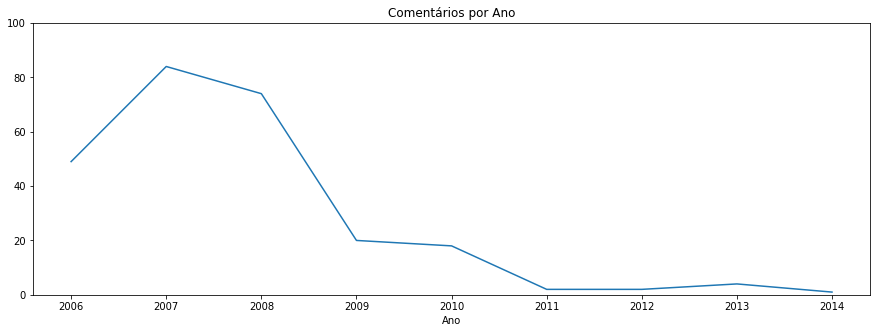

In [8]:
comentarios_ursal.groupby('Ano').size().plot(figsize=(15,5), ylim=(0,100), title='Coment√°rios por Ano')
# alt.Chart(comentarios_ursal).mark_line(point=True).encode(x='timestamp_comentario', y='count()')

## E quais as Comunidades com mais coment√°rios?

In [44]:
len(comentarios_ursal.groupby('comunidade_texto').size())

84

Temos 84 comunidades. Vamos ver as top 20 por n√∫mero de coment√°rios.

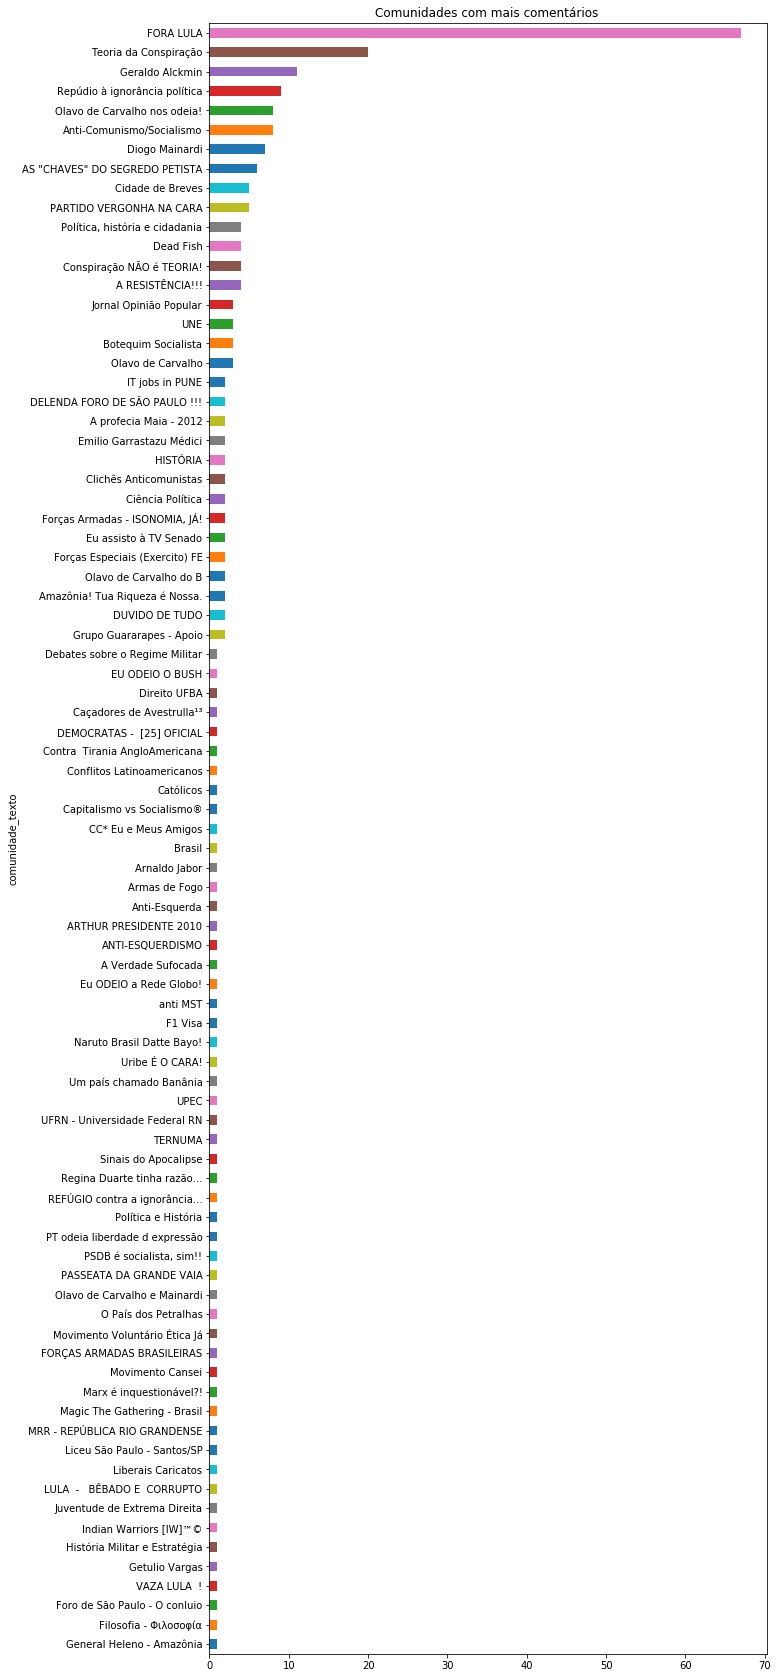

In [6]:
comentarios_ursal.groupby('comunidade_texto').size().sort_values().plot(figsize=(10,30), 
                                                                                            kind='barh',
                                                                                            title='Comunidades com mais coment√°rios ')

## Vendo o Botequim Socialista

Francamente, era o que eu esperava. Todos os t√≥picos s√£o em comunidades de direita... Exceto  um na comunidade da UNE e os de uma comunidade chamada "Botequim Socialista" (https://web.archive.org/web/20160807105858/http://orkut.google.com/c1562400-f.html), cuja descri√ß√£o √©:

------------------------------------------------------
<div class="communityProfileSection communityProfileHeader" style="font-family: monospace;">Territ√≥rio livre e zona desmilitarizada para promover o congra√ßamento e a troca de id√©ias entre as diversas tend√™ncias da esquerda socialista, e tamb√©m para o debate com outras correntes pol√≠ticas. O clima √© de amizade, diferente de comunidades de odiadores dessa ou daquela corrente.<br><br><br>Esse bar tem modera√ß√£o e regras:<br><br><br>1- Pol√™mica sempre, mas nada de insultos ou baixarias;<br><br>2- Aqueles de quaisquer outras tend√™ncias pol√≠ticas est√£o convidados, desde que se comportem;<br><br>3- √â pra fazer social tamb√©m, afinal estamos num bar;<br><br>4- N√£o conversamos com bogus, use seu perfil verdadeiro;<br><br>5- Manifesta√ß√µes de defesa de nazi-fascismo, racismo ou homofobia s√£o pass√≠veis de dele√ß√£o e expuls√£o do autor;<br><br>6- Importante:<br><br><a href="http://www.orkut.com/CommMsgs.aspx?cmm=1562400&amp;tid=2560413052356952533">http://www.orkut.com/CommMsgs<wbr>.aspx?cmm=1562400&amp;tid=256041305235695253<wbr>3</wbr></wbr></a><br><br>Imagem: Revolu√ß√£o Eg√≠pcia<br></div>
------------------------------------------------------




Vamos ver quem s√£o os iluminados do Botequim Socialista que mencionaram a URSAL. 

In [21]:
topicos_ursal[topicos_ursal.nome_comunidade == 'Botequim Socialista']['link_topico']

33    http://orkut.google.com/c1562400-t5808a639d708374.html
34    http://orkut.google.com/c1562400-t5808a639d708374.html
Name: link_topico, dtype: object

In [10]:
comentarios_ursal[comentarios_ursal.comunidade_texto == 'Botequim Socialista'].to_csv('comentaristas_do_botequim.csv')
comentarios_ursal[comentarios_ursal.comunidade_texto == 'Botequim Socialista']

comentario  \
10  URSAL Uni√£o das Rep√∫blicas Socialistas da Am√©rica Latinacomunidade para discutirmos sobre o futuro da revolu√ß√£o na am√©rica latinahttp://www.orkut.com/Community.aspx?cmm=44122069&refresh=1   
11                                                                                        a URSS j√° teve e n√£o pod√≠amos tbm deixar Cuba e a am√©rica central de foraent√£o o melhor √© URSAL mesmo   
12                      Eu acho melhor todo brasileiro que se preze tomar cuidado.Do jeito que a coisa anda, a URSAL vai acabar virando uma realidade.Hahahahahhaahhahahahahahahhahaha!!!!!!!!!   

                          comunidade_link     comunidade_texto  \
10  http://orkut.google.com/c1562400.html  Botequim Socialista   
11  http://orkut.google.com/c1562400.html  Botequim Socialista   
12  http://orkut.google.com/c1562400.html  Botequim Socialista   

            data_comentario  \
10  20 de fevereiro de 2008   
11  20 de fevereiro de 2008   
12   3 de fevereiro de 2007   

                                                link_topico   nome_comentador  \
10   http://orkut.google.com/c1562400-t5808a639d708374.html    aurelio ‚í∂ ! -    
11   http://orkut.google.com/c1562400-t5808a639d708374.html    aurelio ‚í∂ ! -    
12  http://orkut.google.com/c1562400-t8b15110b554577f5.html  Victor Coelho -    

                    nome_topico  num_comentario timestamp_comentario   Ano  
10                        URSAL               1           2008-02-20  2008  
11                        URSAL               2           2008-02-20  2008  
12  √© de rir... ou √© de chorar?               3           2007-02-03  2007

Nota do programador: Estranho, a mesma comunidade apareceu duas vezes. ¬Ø\\_(„ÉÑ)_/¬Ø

Um √© um link, outro √© neutro e.... o terceiro √© piada.

## Afinal, qual o fuzue na Comunidade da UNE?



In [12]:
comentarios_ursal[comentarios_ursal.comunidade_texto == 'UNE'].to_csv('comentarios_une.csv')
comentarios_ursal[comentarios_ursal.comunidade_texto == 'UNE']

comentario  \
13  Veja o q querem fazer com a Am√©rica do SulDelenda Carthago (Delenda deve ser destru√≠da). Cat√£o dizia sempre isso, no fim de todos os seus discursos.Depois da queda do Muro de Berlim em 1989, Fidel...   
15  CALAAAADO! "PORQUE NO TE CALLAS?" O Rei de Espanha, Juan Carlos "O democrata" , foi admir√°vel quando disse "PORQUE NO TE CALLAS?" Ele n√£o se dirigiu s√≥ a Chaves "o Fanfarr√£o"; como democrata e def...   
16  CALAAAADO! "PORQUE NO TE CALLAS?" O Rei de Espanha, Juan Carlos "O democrata" , foi admir√°vel quando disse "PORQUE NO TE CALLAS?" Ele n√£o se dirigiu s√≥ a Chaves "o Fanfarr√£o"; como democrata e def...   

                         comunidade_link comunidade_texto  \
13  http://orkut.google.com/c342194.html              UNE   
15  http://orkut.google.com/c342194.html              UNE   
16  http://orkut.google.com/c342194.html              UNE   

           data_comentario  \
13  10 de novembro de 2009   
15  15 de novembro de 2007   
16  15 de novembro de 2007   

                                               link_topico  \
13  http://orkut.google.com/c342194-t441a35ad9763a552.html   
15  http://orkut.google.com/c342194-ta6fee10a9ce77e07.html   
16  http://orkut.google.com/c342194-te32bc7ce86103098.html   

          nome_comentador                                         nome_topico  \
13          alan cesar -       Lula colocar√° Brasil em guerra se Ch√°vez pedir   
15  Abutre do Apedeuta -         A UNE apoia atitudes como as de Hugo Chavez?   
16  Abutre do Apedeuta -   "Por que n√£o se cala?", diz rei espanhol a Ch√°vez.   

    num_comentario timestamp_comentario   Ano  
13               3           2009-11-10  2009  
15               4           2007-11-15  2007  
16              25           2007-11-15  2007

In [32]:
comentarios_ursal.iloc[13]['comentario']

'Veja o q querem fazer com a Am√©rica do SulDelenda Carthago (Delenda deve ser destru√≠da). Cat√£o dizia sempre isso, no fim de todos os seus discursos.Depois da queda do Muro de Berlim em 1989, Fidel Castro convocou em 1990, junto com Luis In√°cio "Lula" da Silva e o PT, partidos estrangeiros, grupos guerrilheiros, organiza√ß√µes criminosas, ... daAm√©rica Latina, a uma reuni√£o na cidade de S√£o Paulo onde se associaram numa organiza√ß√£o denominada Foro de S√£o Paulo.O objetivo do Foro de S√£o Paulo √© o de apoiar pol√≠tica e financeiramente a implanta√ß√£o do comunismo na Am√©rica Latina.Atualmente, √© implantado por diversos modos, atrav√©s de meios gramscistas, via partidos de esquerda, "C√≠rculos Bolivarianos", para a concretiza√ß√£o da URSAL (Uni√£o das Rep√∫blicas Socialistas da Am√©rica Latina).Este espa√ßo √© para a formula√ß√£o de id√©ias que levem √† neutraliza√ß√£o do totalit√°rio FORO DE S√ÉO PAULO!Delenda Chaves, Fidel, Evo, Lula, FARC, MST, Comunistas, Esquerdopatas,..

In [31]:
comentarios_ursal.iloc[15]['comentario']

'CALAAAADO! "PORQUE NO TE CALLAS?" O Rei de Espanha, Juan Carlos "O democrata" , foi admir√°vel quando disse "PORQUE NO TE CALLAS?" Ele n√£o se dirigiu s√≥ a Chaves "o Fanfarr√£o"; como democrata e defensor das liberdades (pois √©, a democracia e a liberdade tamb√©m precisam de firmes defensores para interpor-se contra os que as agridem), o Rei mandou calarem-se todos os d√©spotas e aspirantes a ditadores da Terra, presentes e ausentes, passados e futuros governantes que buscam o totalitarismo como meio de dominar a massa ignara e alheia , passo a passo, como hoje se v√™, nos principais atores do Foro de S√£o Paulo*, que querem criar a URSAL (Uni√£o das Rep√∫blicas Socialistas da Am√©rica Latina). O brado do REI "PORQUE NO TE CALLAS?"aplica-se a muitos : a Lula "o pregui√ßoso passeador", a Castro "o morto pseudo-falante", a Evo, Ortega, Correa, "os buf√µes da corte bolivariana", etc.  N√≥s, democratas (n√£o estou falando do DEM), para contrapor-nos aos saudosistas do comunismo, que est

E... eram trolls enchendo o saco. Bl√©.

# Conclus√£o

Para ser vi√°vel, a Ursal deveria ter apoio popular maci√ßo das esquerdas. Claramente, n√£o √© o caso. As poucas men√ß√µes que aparecem em comunidades de esquerda s√£o de trolls ou de pessoas tirando sarro da ideia.

E me impressiona a longevidade dessa fanfic da alt-right. Mesmo.

Nas palavras da Princesa Merida, "se isso n√£o √© bugado, eu n√£o sei de mais nada".

<blockquote class="twitter-tweet" data-lang="pt"><p lang="pt" dir="ltr">A DUBLAGEM DA MERIDA SOCORRO <a href="https://t.co/N3bFiwsZ89">pic.twitter.com/N3bFiwsZ89</a></p>&mdash; aunt raiüåπ (@lanapxsrrilla) <a href="https://twitter.com/lanapxsrrilla/status/1031868146691567616?ref_src=twsrc%5Etfw">21 de agosto de 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>



# Agradecimentos

Gostaria de agradecer √† [Tatiana Criscione](https://twitter.com/tatihc_) pela ajuda em me fazer espalhar que ia fazer esse texto ANTES de faz√™-lo, o que super ajudou na minha ansiedade eterna.
